In [1]:
import os
from sys import argv, stdout, stderr
from ROOT import TFile, gROOT, TCanvas, TLegend
import sys                                                                                                                                                                                                                                                  
gROOT.SetStyle("Plain")                                                                                                                                                                                                                                           
gROOT.SetBatch(True)

Welcome to JupyROOT 6.12/07


0.949091732502
1.13255512714
1.21691024303


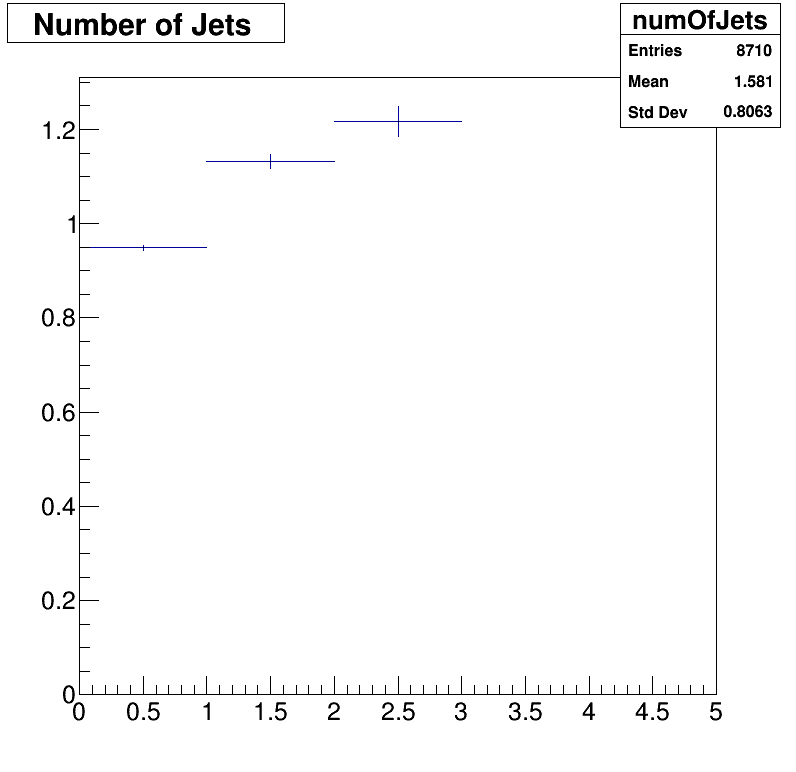

In [2]:
canvas = TCanvas("canvas","canvas",800,800)
fmc = TFile('MC.root')
fdata = TFile('QCD_Pt-20toInf_MuEnrichedPt15_TuneCP5_13TeV_pythia8_v14-v1.root')
femb = TFile('embedded_EmbeddingRun2017B_ElMuFinalState.root')
hmc = fmc.Get('TightOS/numOfJets')
hmcss = fmc.Get('TightSS/numOfJets')
hdatass = fdata.Get('TightSS/numOfJets')
hqcd = hdatass.Clone()
hqcd.Add(hmcss, -1)
hdata = fdata.Get('TightOS/numOfJets')
hemb = femb.Get('TightOS/numOfJets')
hm = hmc.Clone()
hm.Add(hemb, -1)
htm = hm.Clone()
htm.Add(hqcd)
h = hdata.Clone()
h.Add(htm, -1)
h.Divide(hemb)
hdata.Delete()
hmc.Delete()
hmcss.Delete()
hdatass.Delete()
hqcd.Delete()
hemb.Delete()
hm.Delete()
htm.Delete()
#f = TFile('Phi.root',"RECREATE")
#f.cd()
h.Draw()
canvas.Draw()
print h.GetBinContent(1)
print h.GetBinContent(2)
print h.GetBinContent(3)
#h.Write()
#f.Close()